<img src="imgs/IISc_Master_Seal_Black_Transparent.png" height="120px" width="120px" align="right" />

<img src="imgs/logoGESS.jpg" height="120px" width="120px" align="right" />

<font face="Calibri">
<font size="7"> <b> PySHBundle Tutorials </b> </font>
<br> 
<font size="5"> <b> Tutorial 4: Terrestrial Water Storage Time Series<font color='rgba(200,0,0,0.2)'>  </font> </b> </font>
<br> <br>
    
<font size="3"> <b> by: Abhishek Mhamane, IIT Kanpur</b> 
<font size="2">  <br>
<font> <b>Date: </b> August 30, 2023 </font>
</font>


In [1]:
import os
import pprint
import numpy as np
from tqdm import tqdm, trange
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from pyshbundle.new_io import read_jpl, read_csr, read_tn13, read_tn14, extract_C10_11_replcmnt_coeff, klm2sc_new
from pyshbundle.new_io import extract_C20_replcmnt_coeff, extract_C30_replcmnt_coeff, replace_zonal_coeff, find_date_in_replacemnt_file
from pyshbundle.new_io import read_itsg

from pyshbundle import gshs, plm, sc2cs
from pyshbundle.clm2sc import clm2sc_new
from pyshbundle.clm2cs import clm2cs_new
from pyshbundle.basin_avg import basin_avg
from pyshbundle.tws_cal import tws_cal

Initializing PySHbundle v0.0.1


## Load Data

In [3]:
def last_4chars(x):
        #print(x[-39:-32])
        return(x[-11:-4])

In [4]:
tn14_path_itsg = '/media/abhishek/DATA/trial/my_fork/pyshbundle/pyshbundle/data/ITSG_TN_files/TN-14_C30_C20_SLR_GSFC.txt'
tn_13_path_itsg = '/media/abhishek/DATA/trial/my_fork/pyshbundle/pyshbundle/data/ITSG_TN_files/TN-13_GEOC_CSR_RL06.1.txt'
itsg_folder = '/media/abhishek/DATA/trial/my_fork/pyshbundle/sample_input_data/ITSG_input'
itsg_file = '/media/abhishek/DATA/trial/my_fork/pyshbundle/sample_input_data/ITSG_input/ITSG-Grace2018_n96_2004-03.gfc'

In [5]:
# load all the itsg files
files = os.listdir(itsg_folder)
files = sorted(files, key = last_4chars)

data_itsg_mat = np.ndarray((len(files), 4753, 6))
dates_itsg = []
for i in trange(len(files)):
    file_path = itsg_folder + '/' + files[i]
    header = read_itsg(file_path)[0]
    data_itsg_mat[i, :, :] = read_itsg(file_path)[1]
    dates_itsg.append(read_itsg(file_path)[2])

  0%|          | 0/214 [00:00<?, ?it/s]

100%|██████████| 214/214 [00:34<00:00,  6.20it/s]


In [6]:
# Read replacemnt file
data_tn13_itsg = read_tn13(tn_13_path_itsg)
data_tn14_itsg = read_tn14(tn14_path_itsg)

In [7]:
#replace_zonal_coeff(data_mat, data_tn13, data_tn14, epoch_begin, epoch_end)
# Replace zonal coeff
replaced_data_mat_itsg = np.ndarray((len(files), 4753, 6))

unreplaced_idx = set()
for i in trange(len(files)):
    try:
        replaced_data_mat_itsg[i, :, :] = replace_zonal_coeff(data_itsg_mat[i, :, :], 'itsg', 96, data_tn13_itsg, data_tn14_itsg, dates_itsg[i], epoch_end=None)
        #print("\n")
    except IndexError:
        #print(f"Replacement data for File Index {i} - {dates_itsg[i]} could not be found.... procedding to next file")
        unreplaced_idx.add(i)

unreplaced_idx = list(unreplaced_idx)

  5%|▍         | 10/214 [00:00<00:03, 52.09it/s]

Data Date - 2002-04-01, replacemnt date(tn-13) = 2002-04-05
Data Date - 2002-04-01, replacemnt date(tn-13) = 2002-04-05
[1.00000000e+00 0.00000000e+00 5.21793863e-10 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e+00  2.86777277e-10 -6.80704629e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2002-04-01, replacemnt date (tn-14)_ = 2002-04-04
Data Date - 2002-04-01, replacemnt date (tn-14)_ = 2002-04-04
Data Date - 2002-05-01, replacemnt date(tn-13) = 2002-05-03
Data Date - 2002-05-01, replacemnt date(tn-13) = 2002-05-03
[1.00000000e+00 0.00000000e+00 4.69850864e-10 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e+00  1.53669799e-10 -8.90896621e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2002-05-01, replacemnt date (tn-14)_ = 2002-05-02
Data Date - 2002-05-01, replacemnt date (tn-14)_ = 2002-05-02
Data Date - 2002-08-01, replacemnt date(tn-13) = 2002-08-01
Data Date - 2002-08-01, replacemnt date(tn-13) = 2002-08-01
[1.00000

  8%|▊         | 17/214 [00:00<00:03, 59.74it/s]

Data Date - 2003-04-01, replacemnt date(tn-13) = 2003-04-01
Data Date - 2003-04-01, replacemnt date(tn-13) = 2003-04-01
[1.00000000e+00 0.00000000e+00 2.83218175e-10 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e+00  1.39000770e-10 -1.10091345e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2003-04-01, replacemnt date (tn-14)_ = 2003-04-01
Data Date - 2003-04-01, replacemnt date (tn-14)_ = 2003-04-01
Data Date - 2003-05-01, replacemnt date(tn-13) = 2003-05-01
Data Date - 2003-05-01, replacemnt date(tn-13) = 2003-05-01
[1.00000000e+00 0.00000000e+00 3.03491546e-10 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e+00  9.27596678e-11 -4.51809508e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2003-05-01, replacemnt date (tn-14)_ = 2003-05-01
Data Date - 2003-05-01, replacemnt date (tn-14)_ = 2003-05-01
Data Date - 2003-07-01, replacemnt date(tn-13) = 2003-07-01
Data Date - 2003-07-01, replacemnt date(tn-13) = 2003-07-01
[1.00000

 14%|█▍        | 31/214 [00:00<00:02, 63.35it/s]

Data Date - 2004-07-01, replacemnt date(tn-13) = 2004-07-01
Data Date - 2004-07-01, replacemnt date(tn-13) = 2004-07-01
[1.00000000e+00 0.00000000e+00 1.13998722e-10 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [1.00000000e+00 1.00000000e+00 7.65843694e-11 2.31325031e-11
 4.52960000e-11 5.07240000e-11]
Data Date - 2004-07-01, replacemnt date (tn-14)_ = 2004-07-01
Data Date - 2004-07-01, replacemnt date (tn-14)_ = 2004-07-01
Data Date - 2004-08-01, replacemnt date(tn-13) = 2004-08-01
Data Date - 2004-08-01, replacemnt date(tn-13) = 2004-08-01
[ 1.00000000e+00  0.00000000e+00 -4.64810286e-11  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -6.51101850e-11  9.76088641e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2004-08-01, replacemnt date (tn-14)_ = 2004-08-01
Data Date - 2004-08-01, replacemnt date (tn-14)_ = 2004-08-01
Data Date - 2004-09-01, replacemnt date(tn-13) = 2004-09-01
Data Date - 2004-09-01, replacemnt date(tn-13) = 2004-09-01
[ 1.0000

 21%|██▏       | 46/214 [00:00<00:02, 65.18it/s]

[ 1.0000000e+00  0.0000000e+00 -5.2879567e-11  0.0000000e+00
  4.4585000e-11  0.0000000e+00] [ 1.00000000e+00  1.00000000e+00 -1.10670848e-10  2.09057941e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2005-09-01, replacemnt date (tn-14)_ = 2005-09-01
Data Date - 2005-09-01, replacemnt date (tn-14)_ = 2005-09-01
Data Date - 2005-10-01, replacemnt date(tn-13) = 2005-10-01
Data Date - 2005-10-01, replacemnt date(tn-13) = 2005-10-01
[ 1.00000000e+00  0.00000000e+00 -1.86702704e-11  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -9.37715759e-11  1.69796850e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2005-10-01, replacemnt date (tn-14)_ = 2005-10-01
Data Date - 2005-10-01, replacemnt date (tn-14)_ = 2005-10-01
Data Date - 2005-11-01, replacemnt date(tn-13) = 2005-11-01
Data Date - 2005-11-01, replacemnt date(tn-13) = 2005-11-01
[1.00000000e+00 0.00000000e+00 1.05218996e-11 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e

 28%|██▊       | 60/214 [00:00<00:02, 65.04it/s]

[1.00000000e+00 0.00000000e+00 2.29094762e-11 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -9.58182685e-12  1.47741409e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2006-11-01, replacemnt date (tn-14)_ = 2006-11-01
Data Date - 2006-11-01, replacemnt date (tn-14)_ = 2006-11-01
Data Date - 2006-12-01, replacemnt date(tn-13) = 2006-12-01
Data Date - 2006-12-01, replacemnt date(tn-13) = 2006-12-01
[1.00000000e+00 0.00000000e+00 9.71194168e-11 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [1.00000000e+00 1.00000000e+00 6.07982712e-11 3.07530971e-11
 4.52960000e-11 5.07240000e-11]
Data Date - 2006-12-01, replacemnt date (tn-14)_ = 2006-12-01
Data Date - 2006-12-01, replacemnt date (tn-14)_ = 2006-12-01
Data Date - 2007-01-01, replacemnt date(tn-13) = 2007-01-01
Data Date - 2007-01-01, replacemnt date(tn-13) = 2007-01-01
[1.00000000e+00 0.00000000e+00 1.84939794e-10 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [1.00000000e+00 1.00000000e+00 1.32116611

 36%|███▌      | 77/214 [00:01<00:02, 64.33it/s]

Data Date - 2008-03-01, replacemnt date(tn-13) = 2008-03-01
Data Date - 2008-03-01, replacemnt date(tn-13) = 2008-03-01
[1.00000000e+00 0.00000000e+00 2.34262569e-10 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e+00  1.79055066e-10 -8.07378993e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2008-03-01, replacemnt date (tn-14)_ = 2008-03-01
Data Date - 2008-03-01, replacemnt date (tn-14)_ = 2008-03-01
Data Date - 2008-04-01, replacemnt date(tn-13) = 2008-04-01
Data Date - 2008-04-01, replacemnt date(tn-13) = 2008-04-01
[1.00000000e+00 0.00000000e+00 2.67753368e-10 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e+00  2.17045491e-10 -1.03786246e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2008-04-01, replacemnt date (tn-14)_ = 2008-04-01
Data Date - 2008-04-01, replacemnt date (tn-14)_ = 2008-04-01
Data Date - 2008-05-01, replacemnt date(tn-13) = 2008-05-01
Data Date - 2008-05-01, replacemnt date(tn-13) = 2008-05-01
[1.00000

 43%|████▎     | 91/214 [00:01<00:01, 63.86it/s]

Data Date - 2009-03-01, replacemnt date(tn-13) = 2009-03-01
Data Date - 2009-03-01, replacemnt date(tn-13) = 2009-03-01
[1.00000000e+00 0.00000000e+00 1.38527684e-10 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e+00  1.70602971e-10 -1.04010593e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2009-03-01, replacemnt date (tn-14)_ = 2009-03-01
Data Date - 2009-03-01, replacemnt date (tn-14)_ = 2009-03-01
Data Date - 2009-04-01, replacemnt date(tn-13) = 2009-04-01
Data Date - 2009-04-01, replacemnt date(tn-13) = 2009-04-01
[1.00000000e+00 0.00000000e+00 1.88392531e-10 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e+00  1.96087507e-10 -1.83064385e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2009-04-01, replacemnt date (tn-14)_ = 2009-04-01
Data Date - 2009-04-01, replacemnt date (tn-14)_ = 2009-04-01
Data Date - 2009-05-01, replacemnt date(tn-13) = 2009-05-01
Data Date - 2009-05-01, replacemnt date(tn-13) = 2009-05-01
[1.00000

 49%|████▉     | 105/214 [00:01<00:01, 60.42it/s]

[1.00000000e+00 0.00000000e+00 4.31446567e-11 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e+00  1.57904377e-10 -8.05284323e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2010-04-01, replacemnt date (tn-14)_ = 2010-04-01
Data Date - 2010-04-01, replacemnt date (tn-14)_ = 2010-04-01
Data Date - 2010-05-01, replacemnt date(tn-13) = 2010-05-01
Data Date - 2010-05-01, replacemnt date(tn-13) = 2010-05-01
[1.00000000e+00 0.00000000e+00 1.07949969e-10 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e+00  1.15575786e-10 -6.15319543e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2010-05-01, replacemnt date (tn-14)_ = 2010-05-01
Data Date - 2010-05-01, replacemnt date (tn-14)_ = 2010-05-01
Data Date - 2010-06-01, replacemnt date(tn-13) = 2010-06-01
Data Date - 2010-06-01, replacemnt date(tn-13) = 2010-06-01
[ 1.00000000e+00  0.00000000e+00 -9.84097745e-11  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e

 52%|█████▏    | 112/214 [00:01<00:01, 59.75it/s]

[ 1.00000000e+00  1.00000000e+00  1.19237304e-10 -1.66149501e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2011-05-01, replacemnt date (tn-14)_ = 2011-05-01
Data Date - 2011-05-01, replacemnt date (tn-14)_ = 2011-05-01
Data Date - 2011-07-01, replacemnt date(tn-13) = 2011-07-05
Data Date - 2011-07-01, replacemnt date(tn-13) = 2011-07-05
[ 1.00000000e+00  0.00000000e+00 -3.51196908e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -9.60219222e-11 -1.59870971e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2011-07-01, replacemnt date (tn-14)_ = 2011-07-05
Data Date - 2011-07-01, replacemnt date (tn-14)_ = 2011-07-05
Data Date - 2011-08-01, replacemnt date(tn-13) = 2011-08-01
Data Date - 2011-08-01, replacemnt date(tn-13) = 2011-08-01
[ 1.00000000e+00  0.00000000e+00 -4.05604684e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -1.40648996e-10  1.40618792e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2011-

 59%|█████▉    | 126/214 [00:02<00:01, 59.15it/s]

Data Date - 2012-06-01, replacemnt date (tn-14)_ = 2012-06-01
Data Date - 2012-07-01, replacemnt date(tn-13) = 2012-07-01
Data Date - 2012-07-01, replacemnt date(tn-13) = 2012-07-01
[ 1.00000000e+00  0.00000000e+00 -5.17455136e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -1.79319812e-10 -5.24078990e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2012-07-01, replacemnt date (tn-14)_ = 2012-07-01
Data Date - 2012-07-01, replacemnt date (tn-14)_ = 2012-07-01
Data Date - 2012-08-01, replacemnt date(tn-13) = 2012-08-01
Data Date - 2012-08-01, replacemnt date(tn-13) = 2012-08-01
[ 1.00000000e+00  0.00000000e+00 -5.94520342e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -2.64244605e-10  1.97452934e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2012-08-01, replacemnt date (tn-14)_ = 2012-08-01
Data Date - 2012-08-01, replacemnt date (tn-14)_ = 2012-08-01
Data Date - 2012-09-01, replacemnt date(tn-13) = 2012-

 65%|██████▌   | 140/214 [00:02<00:01, 61.17it/s]

Data Date - 2014-01-01, replacemnt date(tn-13) = 2014-01-01
Data Date - 2014-01-01, replacemnt date(tn-13) = 2014-01-01
[ 1.00000000e+00  0.00000000e+00 -1.47932066e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -4.29955388e-11  9.17628478e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2014-01-01, replacemnt date (tn-14)_ = 2014-01-01
Data Date - 2014-01-01, replacemnt date (tn-14)_ = 2014-01-01
Data Date - 2014-03-01, replacemnt date(tn-13) = 2014-03-03
Data Date - 2014-03-01, replacemnt date(tn-13) = 2014-03-03
[ 1.00000000e+00  0.00000000e+00 -1.03526387e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [1.00000000e+00 1.00000000e+00 1.42467085e-10 9.50090371e-12
 4.52960000e-11 5.07240000e-11]
Data Date - 2014-03-01, replacemnt date (tn-14)_ = 2014-03-01
Data Date - 2014-03-01, replacemnt date (tn-14)_ = 2014-03-01
Data Date - 2014-04-01, replacemnt date(tn-13) = 2014-04-01
Data Date - 2014-04-01, replacemnt date(tn-13) = 2014-04-01
[ 

 71%|███████▏  | 153/214 [00:02<00:01, 56.02it/s]

Data Date - 2015-04-01, replacemnt date(tn-13) = 2015-04-01
Data Date - 2015-04-01, replacemnt date(tn-13) = 2015-04-01
Data Date - 2015-04-01, replacemnt date(tn-13) = 2015-04-12
Data Date - 2015-04-01, replacemnt date(tn-13) = 2015-04-12
[ 1.0000000e+00  0.0000000e+00 -2.2841753e-10  0.0000000e+00
  4.4585000e-11  0.0000000e+00] [ 1.00000000e+00  1.00000000e+00  6.16809162e-11 -9.47265573e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2015-04-01, replacemnt date (tn-14)_ = 2015-04-01
Data Date - 2015-04-01, replacemnt date (tn-14)_ = 2015-04-12
Data Date - 2015-04-01, replacemnt date (tn-14)_ = 2015-04-01
Data Date - 2015-04-01, replacemnt date (tn-14)_ = 2015-04-12
Data Date - 2015-07-01, replacemnt date(tn-13) = 2015-06-29
Data Date - 2015-07-01, replacemnt date(tn-13) = 2015-06-29
[ 1.0000000e+00  0.0000000e+00 -5.7536785e-10  0.0000000e+00
  4.4585000e-11  0.0000000e+00] [ 1.00000000e+00  1.00000000e+00 -1.68686821e-10 -6.47982352e-11
  4.52960000e-11  5.07240000e-11]
Data Dat

 78%|███████▊  | 166/214 [00:02<00:00, 57.24it/s]

Data Date - 2016-08-01, replacemnt date (tn-14)_ = 2016-08-08
Data Date - 2016-08-01, replacemnt date (tn-14)_ = 2016-08-08
Data Date - 2016-11-01, replacemnt date(tn-13) = 2016-11-14
Data Date - 2016-11-01, replacemnt date(tn-13) = 2016-11-14
[ 1.00000000e+00  0.00000000e+00 -4.82038618e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -3.53639326e-10  2.05279423e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2016-11-01, replacemnt date (tn-14)_ = 2016-11-14
Data Date - 2016-11-01, replacemnt date (tn-14)_ = 2016-11-14
Data Date - 2016-12-01, replacemnt date(tn-13) = 2016-11-14
Data Date - 2016-12-01, replacemnt date(tn-13) = 2016-11-14
Data Date - 2016-12-01, replacemnt date(tn-13) = 2016-12-11
Data Date - 2016-12-01, replacemnt date(tn-13) = 2016-12-11
[ 1.00000000e+00  0.00000000e+00 -4.82038618e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -3.53639326e-10  2.05279423e-10
  4.52960000e-11  5.07240000e-

 81%|████████  | 173/214 [00:02<00:00, 58.85it/s]

Data Date - 2018-12-01, replacemnt date(tn-13) = 2018-12-01
Data Date - 2018-12-01, replacemnt date(tn-13) = 2018-12-01
[ 1.00000000e+00  0.00000000e+00 -4.50791489e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -2.00493359e-10  5.42046072e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2018-12-01, replacemnt date (tn-14)_ = 2018-12-01
Data Date - 2018-12-01, replacemnt date (tn-14)_ = 2018-12-01
Data Date - 2019-01-01, replacemnt date(tn-13) = 2019-01-01
Data Date - 2019-01-01, replacemnt date(tn-13) = 2019-01-01
[ 1.00000000e+00  0.00000000e+00 -4.18620223e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -1.75640456e-10 -2.16590723e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2019-01-01, replacemnt date (tn-14)_ = 2019-01-01
Data Date - 2019-01-01, replacemnt date (tn-14)_ = 2019-01-01
Data Date - 2019-02-01, replacemnt date(tn-13) = 2019-01-26
Data Date - 2019-02-01, replacemnt date(tn-13) = 2019-01

 87%|████████▋ | 186/214 [00:03<00:00, 55.94it/s]

Data Date - 2019-12-01, replacemnt date(tn-13) = 2019-12-01
Data Date - 2019-12-01, replacemnt date(tn-13) = 2019-12-01
[ 1.00000000e+00  0.00000000e+00 -4.28895923e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -1.01048547e-10  1.05394529e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2019-12-01, replacemnt date (tn-14)_ = 2019-12-01
Data Date - 2019-12-01, replacemnt date (tn-14)_ = 2019-12-01
Data Date - 2020-01-01, replacemnt date(tn-13) = 2020-01-01
Data Date - 2020-01-01, replacemnt date(tn-13) = 2020-01-01
[ 1.00000000e+00  0.00000000e+00 -3.54395553e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -8.87519291e-11  7.58195544e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2020-01-01, replacemnt date (tn-14)_ = 2020-01-01
Data Date - 2020-01-01, replacemnt date (tn-14)_ = 2020-01-01
Data Date - 2020-02-01, replacemnt date(tn-13) = 2020-02-01
Data Date - 2020-02-01, replacemnt date(tn-13) = 2020-02

 93%|█████████▎| 198/214 [00:03<00:00, 56.81it/s]

Data Date - 2021-01-01, replacemnt date(tn-13) = 2021-01-01
Data Date - 2021-01-01, replacemnt date(tn-13) = 2021-01-01
[ 1.00000000e+00  0.00000000e+00 -4.90757516e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -9.26908363e-11  1.27805430e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2021-01-01, replacemnt date (tn-14)_ = 2021-01-01
Data Date - 2021-01-01, replacemnt date (tn-14)_ = 2021-01-01
Data Date - 2021-02-01, replacemnt date(tn-13) = 2021-02-01
Data Date - 2021-02-01, replacemnt date(tn-13) = 2021-02-01
[ 1.00000000e+00  0.00000000e+00 -4.57552206e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [1.00000000e+00 1.00000000e+00 2.80822650e-11 8.61834114e-11
 4.52960000e-11 5.07240000e-11]
Data Date - 2021-02-01, replacemnt date (tn-14)_ = 2021-02-01
Data Date - 2021-02-01, replacemnt date (tn-14)_ = 2021-02-01
Data Date - 2021-03-01, replacemnt date(tn-13) = 2021-03-01
Data Date - 2021-03-01, replacemnt date(tn-13) = 2021-03-01
[ 

100%|██████████| 214/214 [00:03<00:00, 60.06it/s]

Data Date - 2022-01-01, replacemnt date (tn-14)_ = 2022-01-01
Data Date - 2022-02-01, replacemnt date(tn-13) = 2022-02-01
Data Date - 2022-02-01, replacemnt date(tn-13) = 2022-02-01
[ 1.00000000e+00  0.00000000e+00 -5.10088293e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -9.99323049e-11  1.22621728e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2022-02-01, replacemnt date (tn-14)_ = 2022-02-01
Data Date - 2022-02-01, replacemnt date (tn-14)_ = 2022-02-01
Data Date - 2022-03-01, replacemnt date(tn-13) = 2022-03-01
Data Date - 2022-03-01, replacemnt date(tn-13) = 2022-03-01
[ 1.00000000e+00  0.00000000e+00 -4.53193643e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [1.00000000e+00 1.00000000e+00 5.11079704e-12 4.02960086e-11
 4.52960000e-11 5.07240000e-11]
Data Date - 2022-03-01, replacemnt date (tn-14)_ = 2022-03-01
Data Date - 2022-03-01, replacemnt date (tn-14)_ = 2022-03-01
Data Date - 2022-04-01, replacemnt date(tn-13) = 2022-04-01


In [8]:
scmat_deck_itsg = np.ndarray((len(files), 97, 193))

for i in trange(196):
    if i not in unreplaced_idx:
        scmat_deck_itsg[i, :, :] = clm2sc_new(replaced_data_mat_itsg[i, :, :], lmax=96)
    
    

100%|██████████| 196/196 [00:01<00:00, 131.65it/s]


## ITSG Temporal Mean

In [9]:
temporal_mean_itsg = 0
for i in trange(196):
    temporal_mean_itsg += scmat_deck_itsg[i, :, :]

temporal_mean_itsg /= 196


100%|██████████| 196/196 [00:00<00:00, 43276.67it/s]


### Substract the mean from temopral data

In [10]:
sub_mat_itsg = np.ndarray((196, 97, 193))
for i in range(196):
    sub_mat_itsg[i, :, :] = scmat_deck_itsg[i, :, :] - temporal_mean_itsg

## Basin Average Computation

In [11]:
import cartopy
import cartopy.crs as ccrs
import geopandas as gpd
import xarray as xr
import numpy as np
import salem
import copy

path_shapefile = '/media/abhishek/DATA/krishna_basefile/amazon_basin.shp'
c_rs = 'EPSG:24882'
amazon_shp = gpd.read_file(path_shapefile)

## Subsetting the TWS Field to the basin

In [12]:
lmax = 96
gs = 0.5
half_rad_gf = 500
no_of_files = 196

tws_fields_itsg = tws_cal(sub_mat_itsg,lmax,gs,half_rad_gf,no_of_files)
#tws_fields_istg = np.float32(tws_fields_itsg)

  0%|          | 0/196 [00:00<?, ?it/s]


TypeError: 'module' object is not callable

In [15]:
lon = np.arange(-180,180,gs)
lat = np.arange(89,-91,-gs)
dates = pd.to_datetime(pd.Series(dates_itsg[:196]), format='%Y-%m') #.dt.strftime('%d-%m-%Y')


ds = xr.Dataset(
    data_vars=dict(
        tws=(["time","lat", "lon"], np.float32(tws_fields_itsg))
    ),
    coords = {
        "time":(('time'),dates),
        "lat":lat,
        "lon":lon },
    attrs=dict(description="TWS Anomaly corresponding to long term (2004-2010) mean \n lmax=96 and half radius of Gaussian filter = 500Km"),
)
ds

<xarray.Dataset>
Dimensions:  (time: 196, lat: 360, lon: 720)
Coordinates:
  * time     (time) datetime64[ns] 2002-04-01 2002-05-01 ... 2021-05-01
  * lat      (lat) float64 89.0 88.5 88.0 87.5 87.0 ... -89.0 -89.5 -90.0 -90.5
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
Data variables:
    tws      (time, lat, lon) float32 20.09 20.11 20.13 ... 107.5 107.5 107.6
Attributes:
    description:  TWS Anomaly corresponding to long term (2004-2010) mean \n ...

In [16]:
def field2dataset(data_variable, description=None):
    gs = 1.0
    lon = np.arange(-180,180,gs)
    lat = np.arange(89,-91,-gs)
    dates = pd.to_datetime(dates_itsg[0], format='%Y-%m') #.dt.strftime('%d-%m-%Y')


    ds = xr.Dataset(data_vars=dict(tws=(["lat", "lon"], data_variable)),
            coords = {
                "lat":lat,
                "lon":lon },
            attrs=dict(description=f"{description}"),)
    return ds

Area of basin in km2: 6499645.5323355235


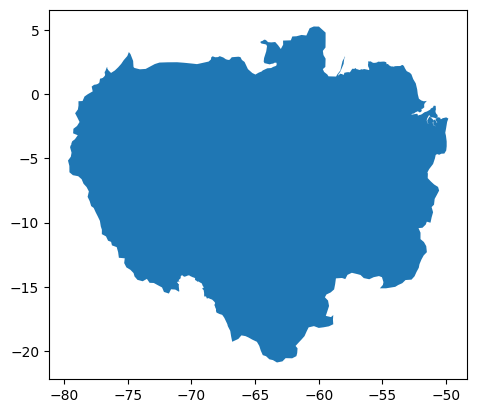

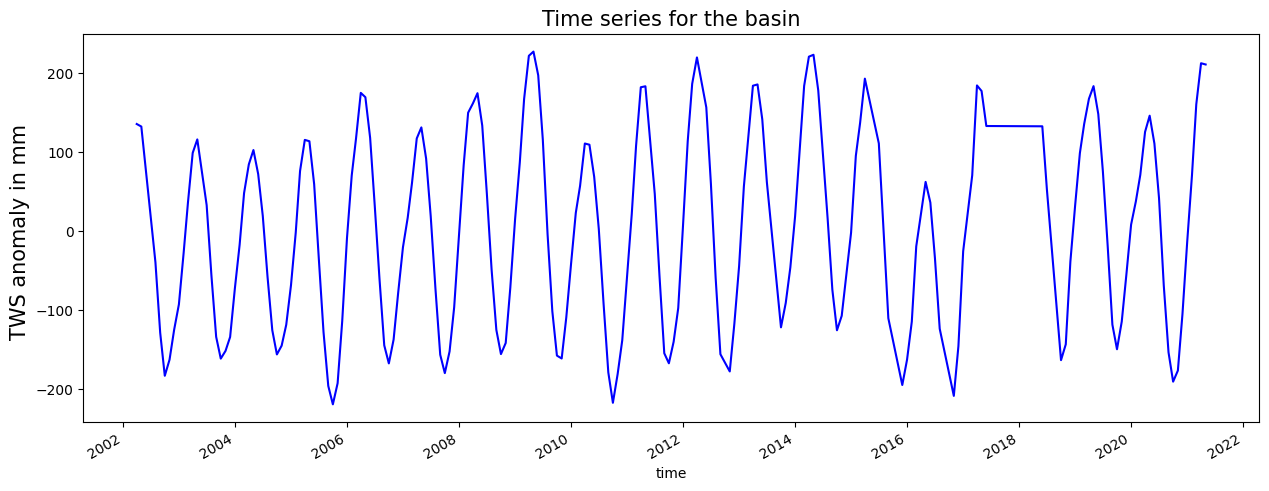

In [17]:
amazon_tws_itsg, data_vars = basin_avg(ds, path_shapefile, c_rs, no_of_files, gs)

Here it can be seen that the default plot does not show the nuances properly, there are certain datagaps which need to be indicated using the following process.

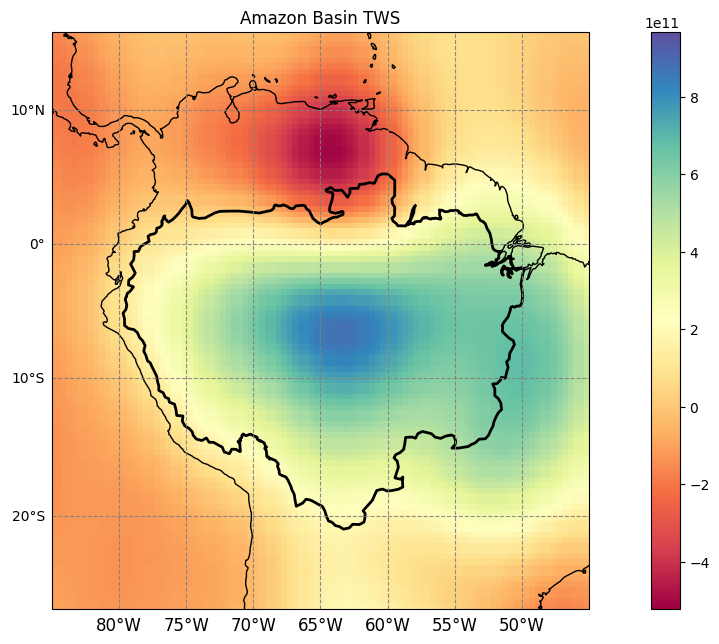

In [18]:
fig = plt.figure(figsize=(16, 7.5))
geo_ax = plt.axes(projection = ccrs.Mercator())

# This can be converted into a `proj4` string/dict compatible with GeoPandas
im = geo_ax.imshow(data_vars.tws[0], origin='upper', cmap='Spectral', transform=ccrs.PlateCarree(),)
gl = geo_ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.9, linestyle='--')
    # remove top x label
gl.top_labels = False
# change x label styles - font size ad colour
gl.xlabel_style = {'size':12,}
# left and right labels
gl.left_labels = True
gl.right_labels = False
# coastlines
geo_ax.set_extent((-85, -45, -25, 15))
geo_ax.coastlines()
plt.title("Amazon Basin TWS")
crs_proj4 = ccrs.Mercator().proj4_init
df_ae = amazon_shp.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot(ax=geo_ax, facecolor="None", edgecolor='k', linewidth = 2,)

plt.colorbar(im)

In [20]:
df_itsg = pd.DataFrame()
df_itsg['date_grace'] = pd.date_range(start=dates_itsg[0],end=dates_itsg[-1], freq='M').to_period('M')
df_itsg['tws'] = np.nan

In [21]:
dates_itsg[-1]

'2022-11'

In [22]:
dates_grace = []
for date in dates:
    dates_grace.append(date.to_period('M'))

In [23]:
for i in range(230):
    date_gr = df_itsg.date_grace[i]
    if date_gr in dates_grace:
        idx = dates_grace.index(date_gr)
        df_itsg.tws[i] = amazon_tws_itsg.values[idx]


/tmp/ipykernel_199853/2760827488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_itsg.tws[i] = amazon_tws_itsg.values[idx]


In [24]:
df_itsg

,date_grace,tws
0,2002-04,135.455051
1,2002-05,132.216824
2,2002-06,NaN
3,2002-07,NaN
4,2002-08,-39.861949
...,...,...
242,2022-06,NaN
243,2022-07,NaN
244,2022-08,NaN
245,2022-09,NaN


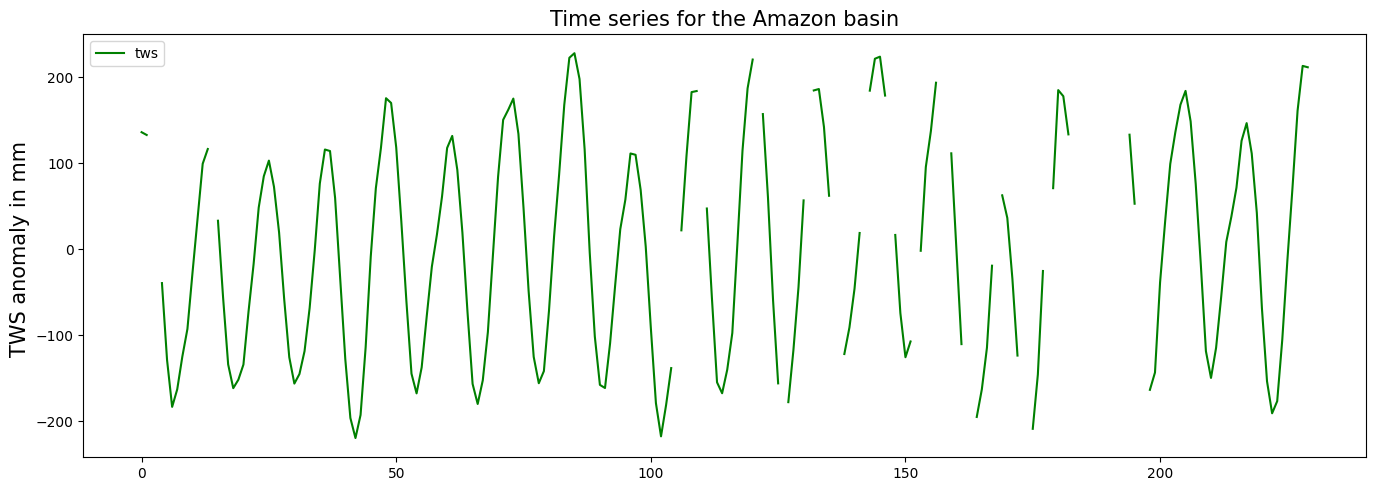

In [25]:
fig,ax = plt.subplots(figsize=(15,5))

df_itsg.plot(ax=ax, color='g', label="ITSG")
ax.set_box_aspect(0.33)
ax.set_title('Time series for the Amazon basin', size=15)
ax.set_ylabel('TWS anomaly in mm ', size=15)
#plt.xticks(x_ticks)
plt.tight_layout()

